In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn import datasets
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import VarianceThreshold

from sklearn.decomposition import PCA

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train.csv')
original_data = df

df = df.drop('StoreID',axis = 1)
df = df.drop('Region',axis = 1)

# Correlation - heat map

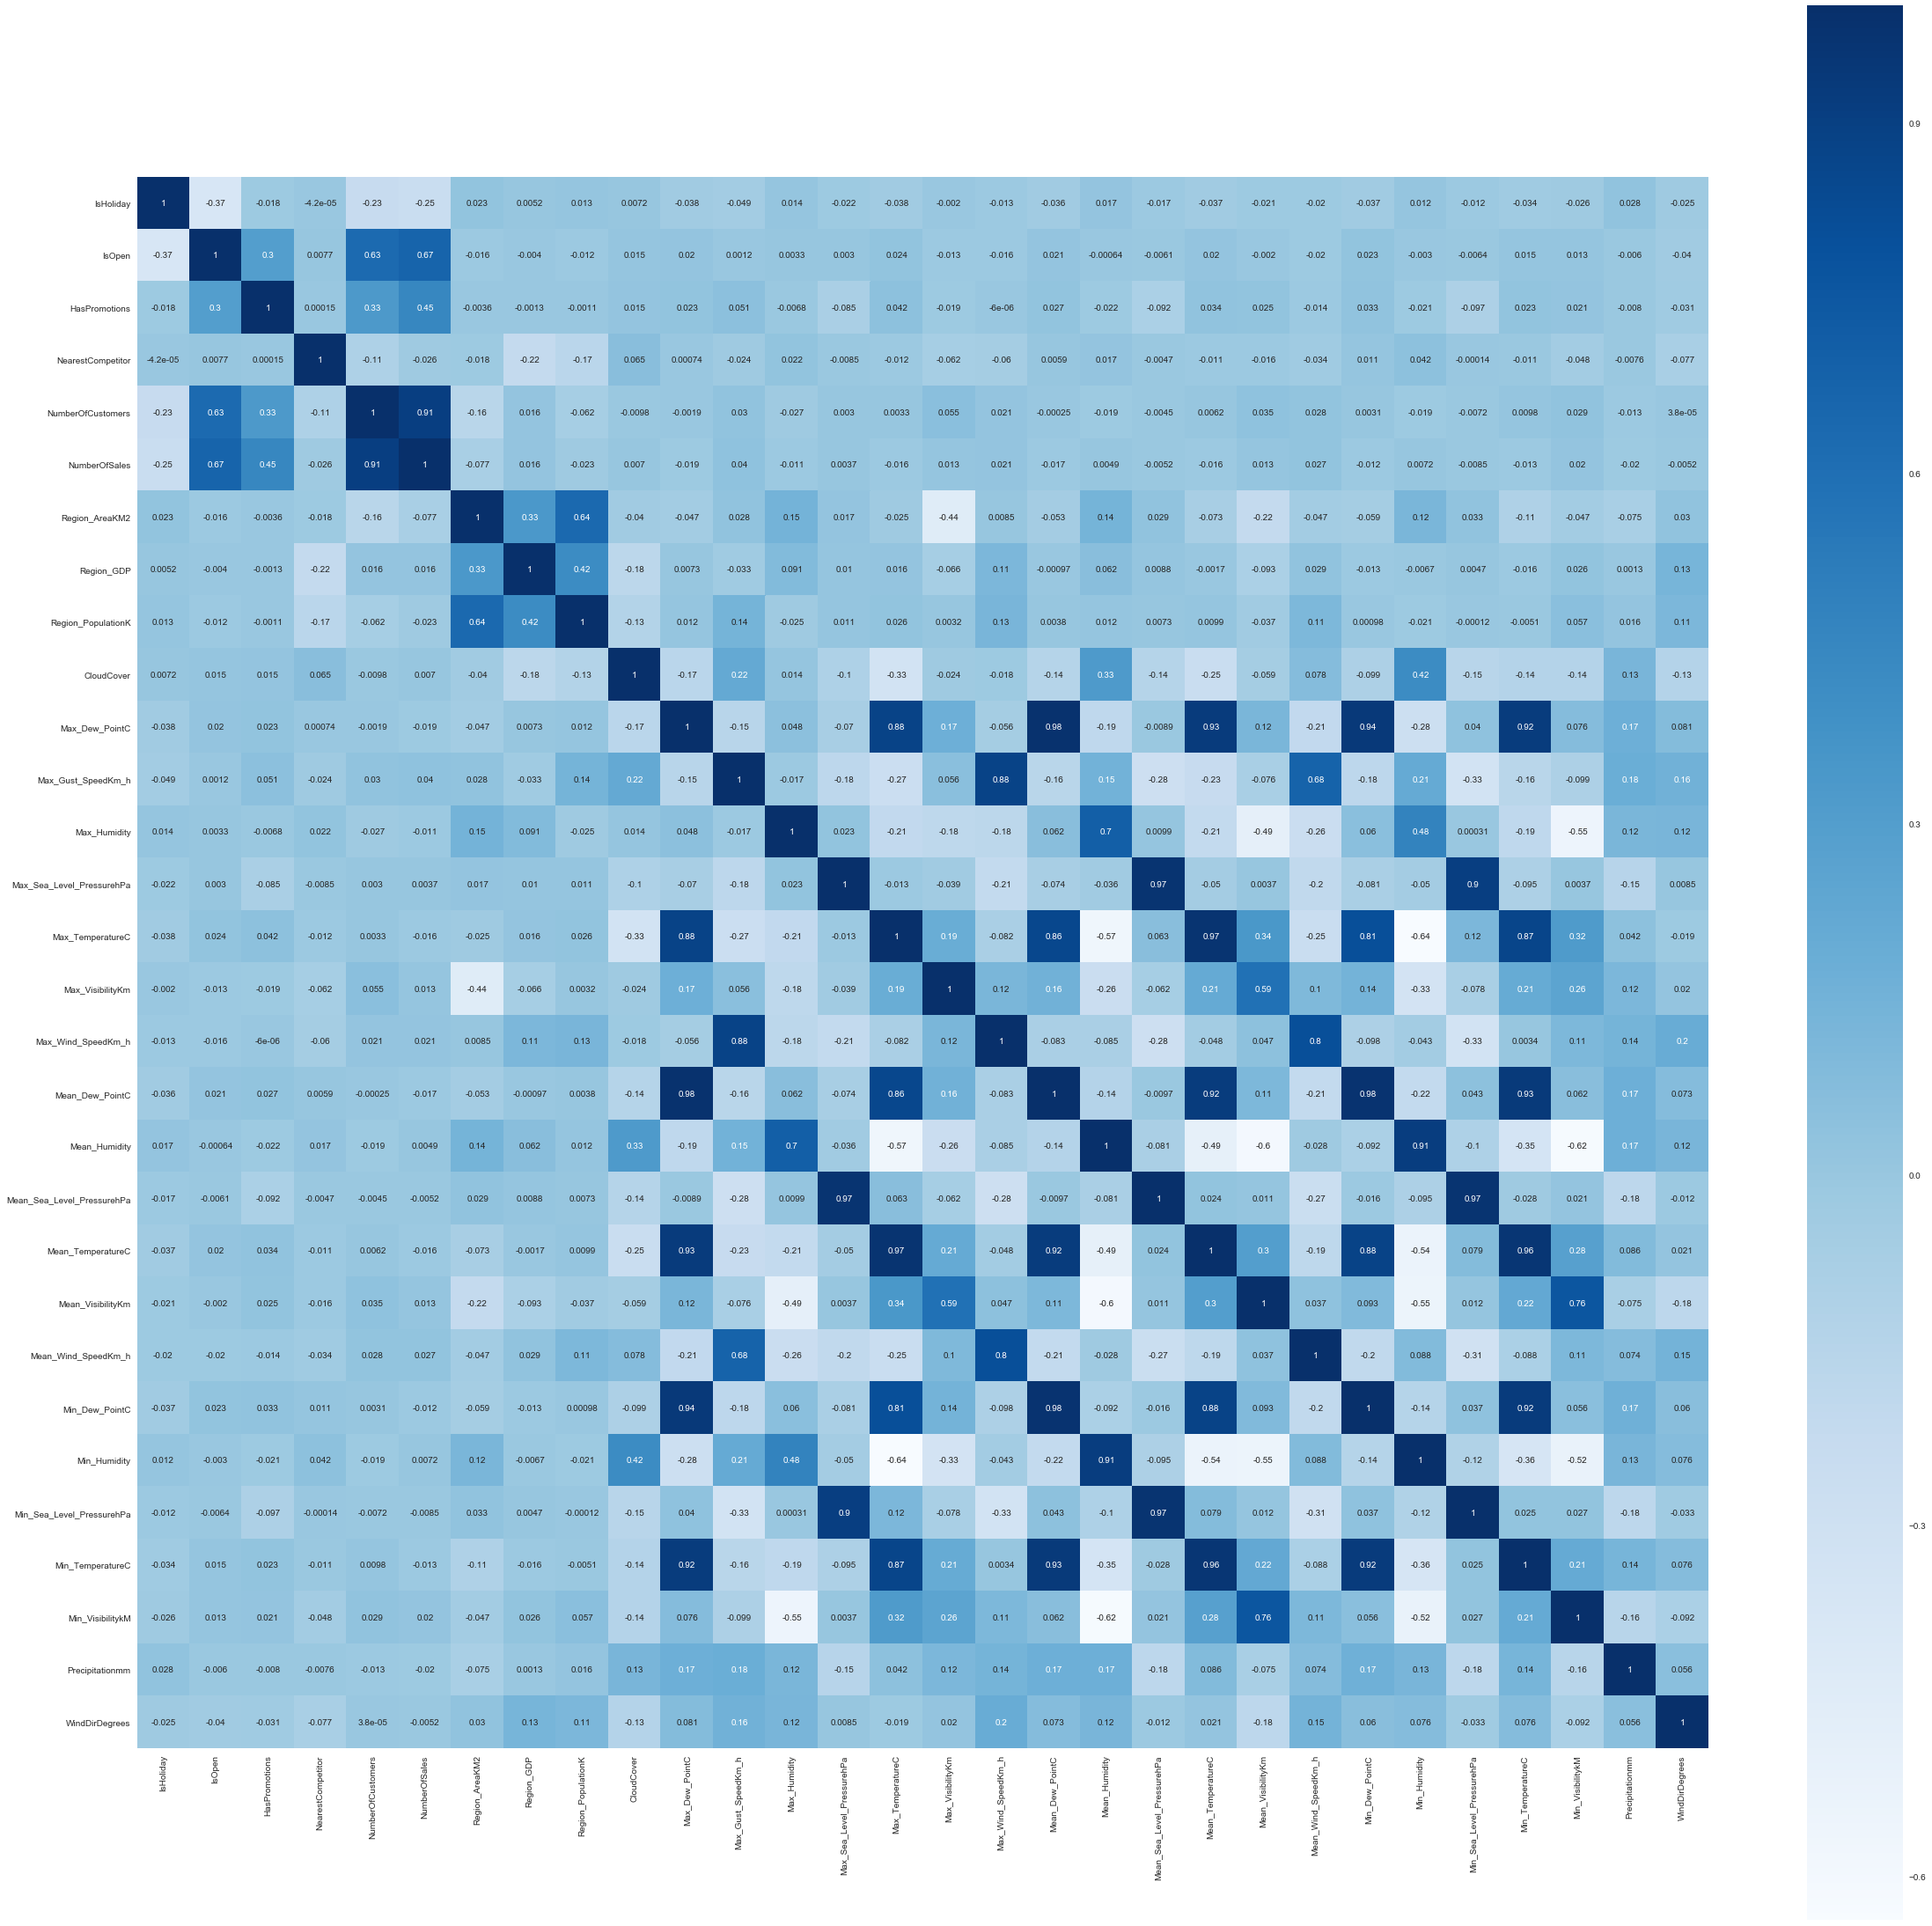

In [3]:
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":10,"axes.titlesize":24,"axes.labelsize":5})   

fig, ax = plt.subplots(figsize=(40,40))  

cov=df.corr(method='pearson')
sns.heatmap(cov,square=True,annot=True,cmap="Blues")

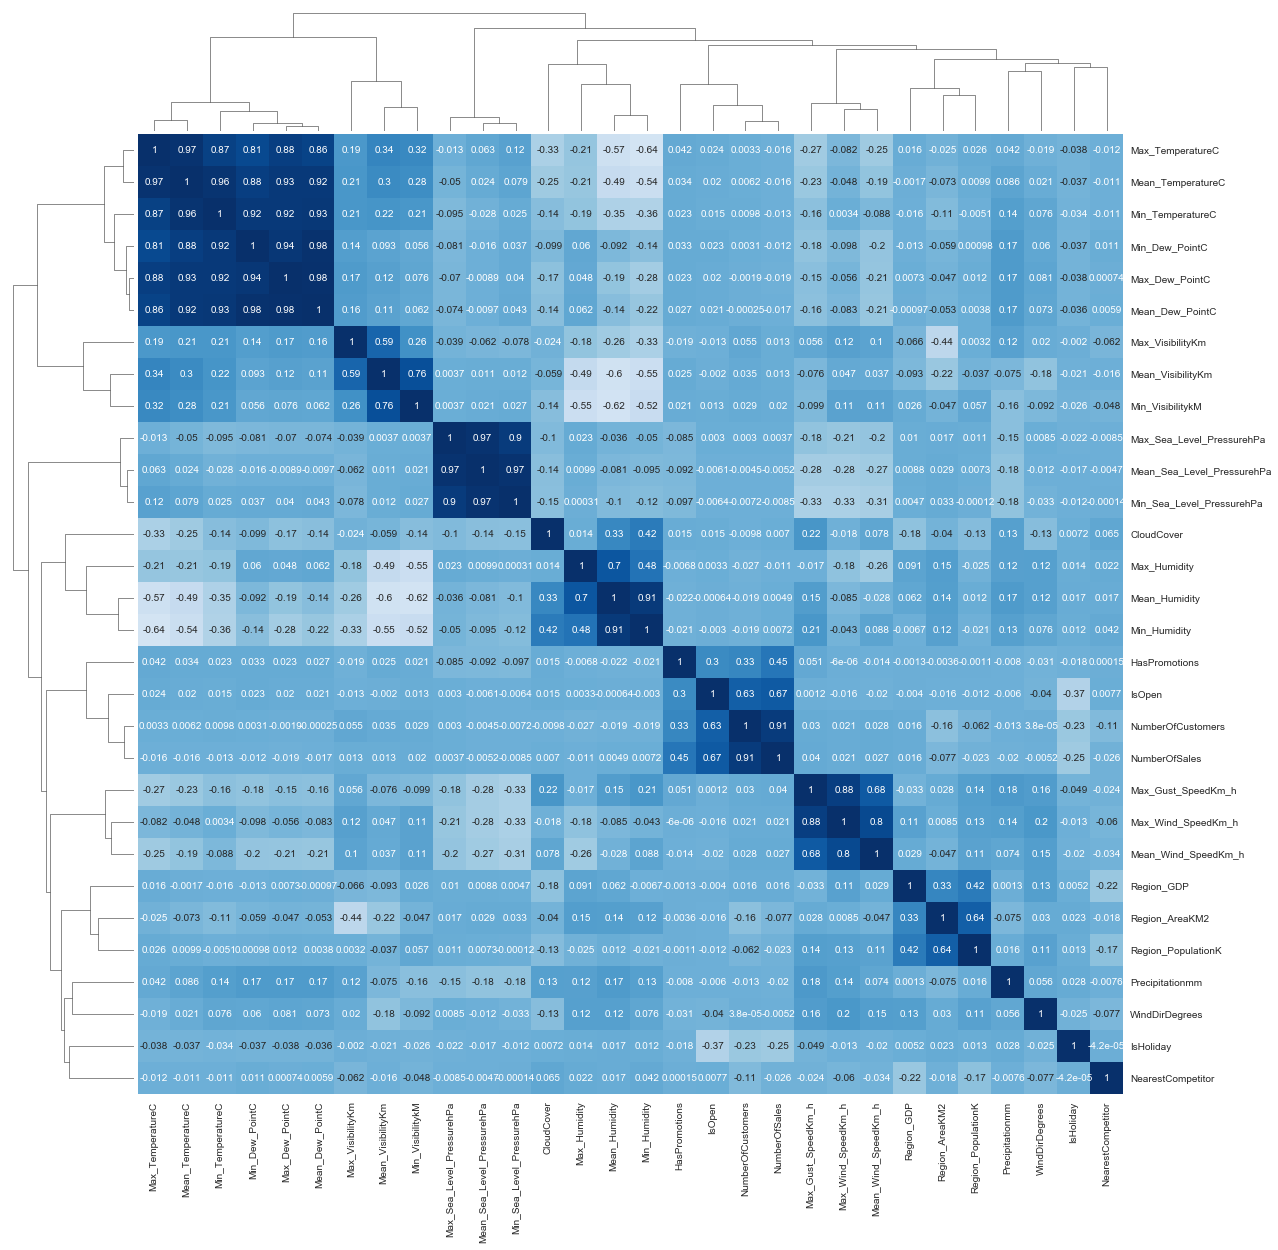

In [4]:
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(20, 20))
cm.cax.set_visible(False)

# Sales per week
Not much to see, just an increament of sales during the christmas period

In [5]:
df = pd.read_csv('preprocessed_train_with_avg.csv')
original_data = df

In [6]:
df_grouped = original_data.groupby(['Region','Week','StoreID','Year'], as_index=False).agg({"NumberOfSales": "sum"})
df_grouped.head()

,Region,Week,StoreID,Year,NumberOfSales
0,0,1,1001,2017,13873
1,0,1,1001,2018,17844
2,0,1,1009,2017,21091
3,0,1,1009,2018,20440
4,0,1,1019,2017,19655


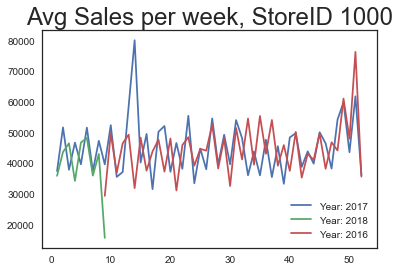

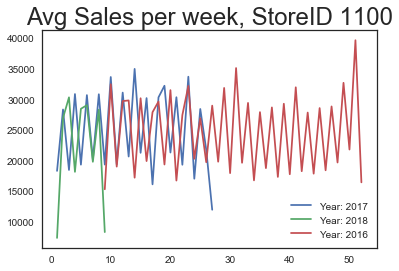

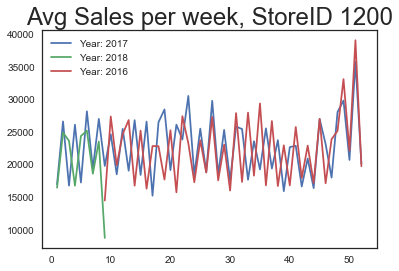

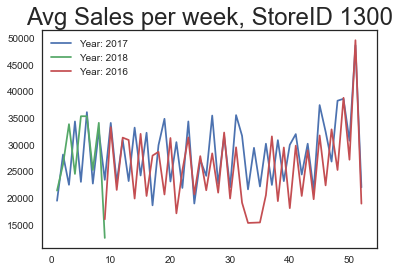

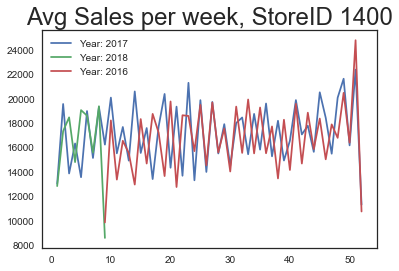

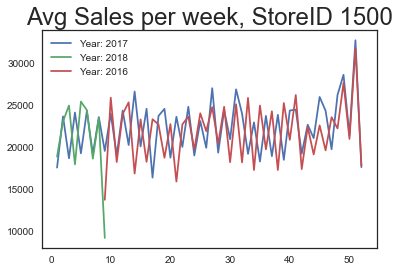

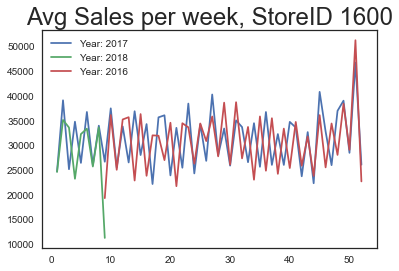

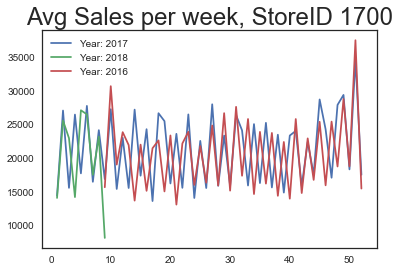

In [7]:
for s in range(1000,1748,100):
    data = df_grouped[df_grouped.StoreID == s]
    data.index = data.Week
    for y in data.Year.unique():
        dt = data[data.Year == y]
        line = dt['NumberOfSales']
        plt.plot(line, label='Year: %d'%y)
        
    plt.title('Avg Sales per week, StoreID %i' %s)
    #my_xticks = ['Mon','Tue','Wed','Thu','Fri','Sat']
    #plt.xticks(range(6),my_xticks)
    plt.legend()
    plt.show()
    

# Sales per weekday and year

In [8]:
df_grouped = original_data.groupby(['DayOfWeek','StoreID','Year'], as_index=False).agg({"NumberOfSales": "mean"})
df_grouped.tail()

,DayOfWeek,StoreID,Year,NumberOfSales
13529,6,1676,2016,4979.581395
13530,6,1676,2017,5137.547170
13531,6,1676,2018,5445.625000
13532,6,1720,2016,2422.909091
13533,6,1720,2017,2590.588235


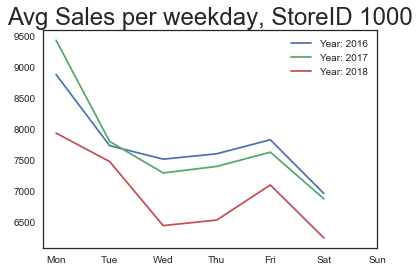

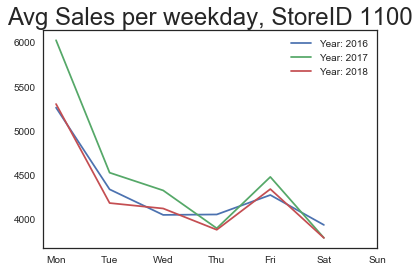

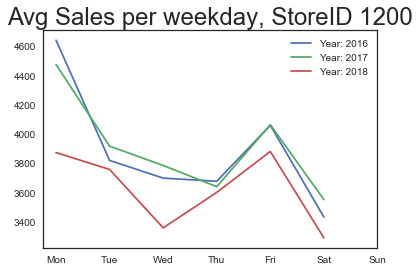

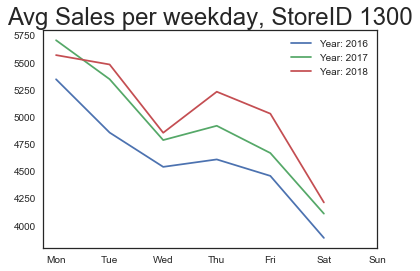

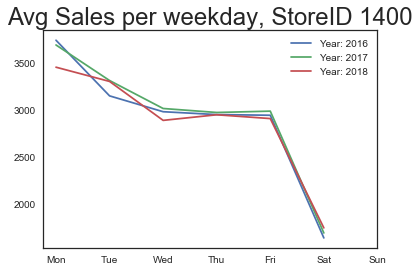

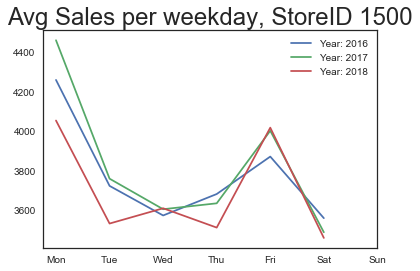

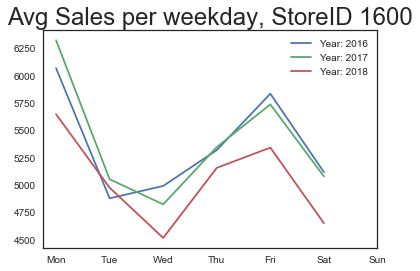

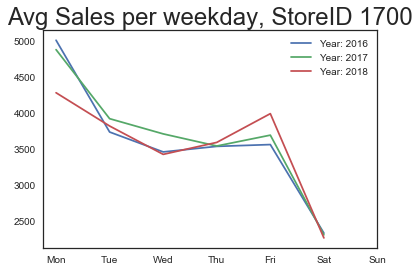

In [9]:
for s in range(1000,1748,100):
    data = df_grouped[df_grouped.StoreID == s]
    data.index = data.DayOfWeek
    for y in data.Year.unique():
        dt = data[data.Year == y]
        line = dt['NumberOfSales']
        plt.plot(line, label='Year: %d'%y)
        
    plt.title('Avg Sales per weekday, StoreID %i' %s)
    my_xticks = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    plt.xticks(range(7),my_xticks)
    plt.legend()
    plt.show()
    

# Sales per weekday and promotions

In [10]:
df_grouped = original_data.groupby(['DayOfWeek','StoreID','HasPromotions'], as_index=False).agg({"NumberOfSales": "mean"})
df_grouped.tail()

,DayOfWeek,StoreID,HasPromotions,NumberOfSales
8254,6,1445,0,1433.014925
8255,6,1517,0,1346.774194
8256,6,1615,0,2071.542857
8257,6,1676,0,5095.932692
8258,6,1720,0,2508.000000


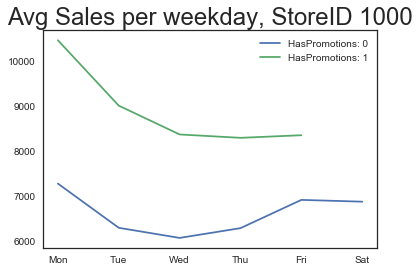

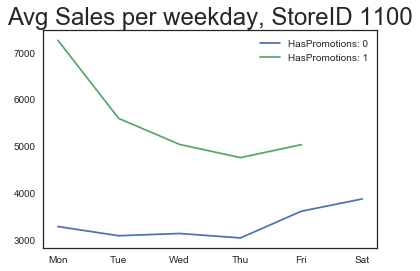

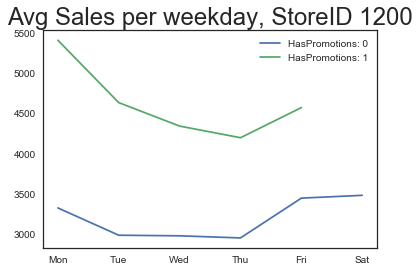

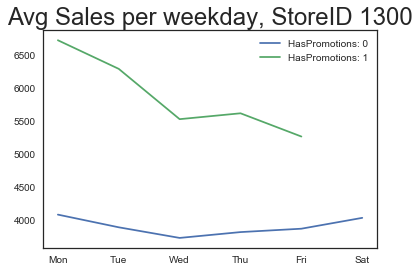

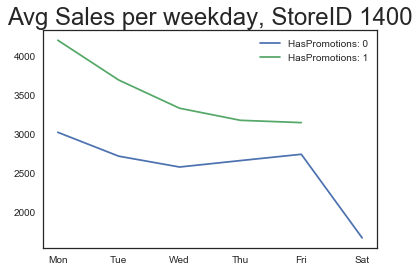

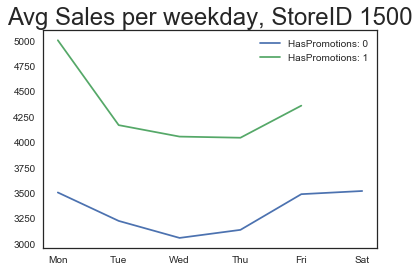

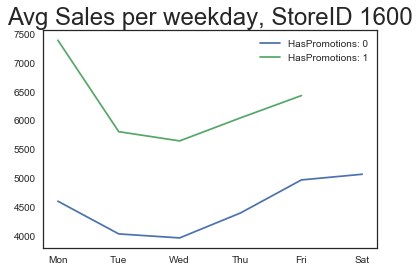

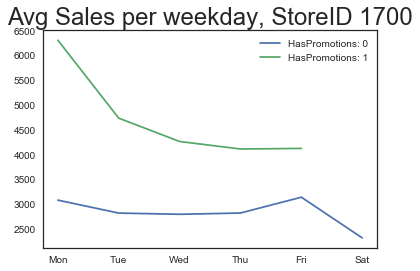

In [11]:
for s in range(1000,1748,100):
    data = df_grouped[df_grouped.StoreID == s]
    data.index = data.DayOfWeek
    for h in data.HasPromotions.unique():
        dt = data[data.HasPromotions == h]
        line = dt['NumberOfSales']
        plt.plot(line, label='HasPromotions: %d'%h)
        
    plt.title('Avg Sales per weekday, StoreID %i' %s)
    my_xticks = ['Mon','Tue','Wed','Thu','Fri','Sat']
    plt.xticks(range(6),my_xticks)
    plt.legend()
    plt.show()
    

# What's else?

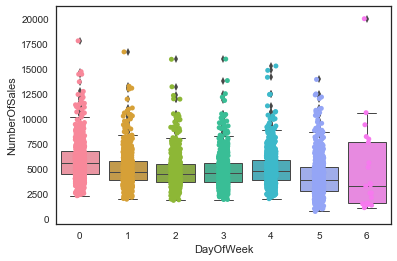

In [12]:
df_grouped = original_data.groupby(['DayOfWeek','StoreID'], as_index=False).agg({"NumberOfSales": "mean"})


sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
ax = sns.boxplot(x="DayOfWeek", y="NumberOfSales", data=df_grouped)
ax = sns.stripplot(x="DayOfWeek", y="NumberOfSales", data=df_grouped, jitter=True, edgecolor="gray")